<a href="https://colab.research.google.com/github/teteumac/ML_Alabama/blob/main/C%C3%B3pia_de_03_Decision_Trees_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands On Exercise 3: Decision Trees

**Chapter 6 – Decision Trees**

Due date: 2022-02-14

File name convention: For group 42 and memebers Richard Stallman and Linus Torvalds it would be 
"03_Decision_Trees_Goup42_Stallman_Torvalds.pdf".

Submission via blackboard (UA) or Google Form (see notion, LPC).

Feel free to answer free text questions in text cells using markdown and possibly $\LaTeX{}$ if you want to.

**You don't have to understand every line of code here and it is not intended for you to try to understand every line of code.   
Big blocks of code are usually meant to just be clicked through.**

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/UAPH4582/PH482_582_Sp22/blob/main/Exercises/03_Decision_Trees.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# Setup

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Loading the data

Here we will be using the [iris dataset](https://archive.ics.uci.edu/ml/datasets/Iris).
Try to understand the features (`X[i]`) and the labels (`y[i]`) from the link above.

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target


In [ ]:
X.shape  # 150 instances, 2 features per instance (petal length and width)

(150, 2)

In [ ]:
y.shape

(150,)

Now that we have the data we can fit a model to it.

# Decision Trees for Classification

### Task 1

Build a simple [decision tree classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) with `max_depth` of 2 and `random_state` of 40. Fit to the data `X`, `y`.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
your code goes below

In [ ]:
 tree_clf = DecisionTreeClassifier(max_depth = 2, random_state=40)
 tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=40)

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this 

### Visualization of the Decision Tree

**Note** Next step requires the GraphViz executable installed. Since there is a lot of additional work, it is recommended to work through a Colab notebook instead. However, if you'd like to continue working locally, follow the steps below. 

To intall GraphViz, download it here: https://graphviz.org/download/

During the installation, make sure its path was added to the Path environmental variable. For your user, add the path to the bin folder, for the system environmental variable, add the path to the ```dot.exe``` file. 
```
C:\Program Files (x86)\Graphviz2.38\bin
C:\Program Files (x86)\Graphviz2.38\bin\dot.exe
``` 

Then, you can use pip or conda to install the package: ```pip install graphiz``` or ```conda install graphiz```

Finally, close your Jupyter notebook, close the command promt executing it and restart both. 

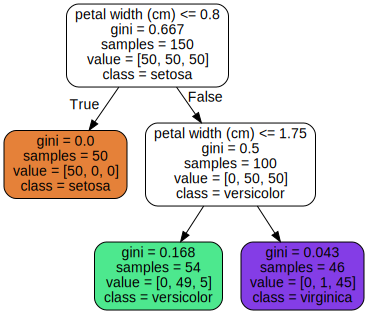

In [ ]:
from graphviz import Source
from sklearn.tree import export_graphviz

IMAGES_PATH = os.path.join(".", "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

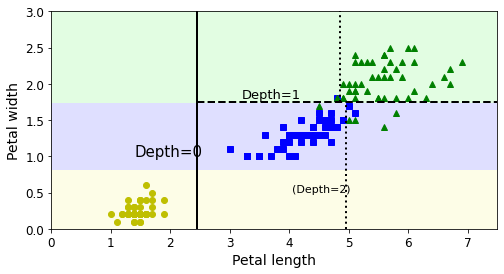

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

## Predicting classes and class probabilities

### Task 2
Next, predict the probabilities and the class for the following values: ``` [5, 1.5] ```.

You will need the functions `tree_clf.predict_proba()` and `tree_clf.predict()`.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
your code goes below

In [ ]:
pred_prob = tree_clf.predict_proba([[5, 1.5]])
pred_prob

array([[0.        , 0.90740741, 0.09259259]])

In [ ]:
y_pred = tree_clf.predict([[5, 1.5]])
y_pred

array([1])

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this 

You can also check in the plot above in what class you would put the instance `[5, 1.5]`.
In the plot yellow corresponds to class 0 (Iris setosa), blue corresponds to class 1 (Iris versicolor) and green corresponds to class 2 (Iris virginica).

## Sensitivity to training set details

### Task 3
Next, we want to expolore the sensitivity to the training set details. 
We will train the same decision tree model, but with slightly different training data.


**Task 3a**: What does the output below show? 

Hint: refer to the [dataset description](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)
and think about the slicing of the array below. Which values are selected and which data do they show?
It helps to evaluate parts of the expression separately and try to understand them.

In [ ]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] 

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]


↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
your code goes below

Task 3a answer: This array is True when the width of a petal is equal to the maximum value of the Iris versicolor petal width (1.8) and it is a Iris versicolor petal.

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this 

**Task 3b**: Now, what if we select the values that are NOT 1.8. Which data would the dataset represent? 

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
your code goes below

Task 3b answer: This data set will represent the original data but without the Iris versicolor(s) with higher petal width.

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this 

In [ ]:
not_1_8 = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_1_8]
y_tweaked = y[not_1_8]

**Task 3c**: Fit a new Decision Tree Classifier to these values (`X_tweaked`, `y_tweaked`) with the same initial parameter values ```max_depth = 2``` and ```random_state = 42```.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
your code goes below

In [ ]:
tree_clf_tweaked = tree_clf.fit(X_tweaked, y_tweaked)

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this 

So now we have trained a new decision tree `tree_clf_tweaked` that has slightly different training data (actually only *one* element less).   
Let's visualize the new decision tree.

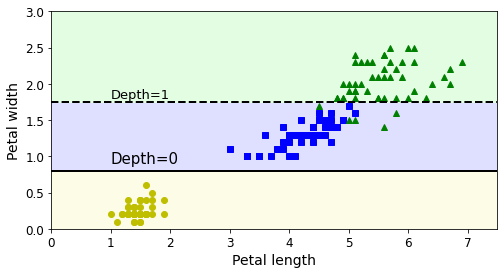

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)
plt.show()

**Task 3d**: Describe how the new decision tree is different from the one before.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
your code goes below

Task 3d answer: The new decision tree differs from the past one because it only looks the feature petal width when splitting. A split in petal length did not improve the gain of the tree, it stopped with depth tree equal to one.

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this 

# Regression Trees

In this subsection, we will be working with a regression task. 
Notice that the dataset below is different. Here we are using a training set generated by a quadratic function with the addition of some random noise. 

In [ ]:
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

### Task 4
Similar to what you've done above, create a [decision tree regressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) with the same hyperparameters as the classifier. 

In [ ]:
from sklearn.tree import DecisionTreeRegressor


↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [ ]:
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=40)

In [ ]:
tree_reg.fit(X,y)

DecisionTreeRegressor(max_depth=2, random_state=40)

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this 

Below, you'll see the difference in the prediction for an increased value of the ```max_depth``` parameter. What can you say about the results?

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

In [ ]:
export_graphviz(
        tree_reg1,
        out_file=os.path.join(IMAGES_PATH, "regression_tree.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
    )
Source.from_file(os.path.join(IMAGES_PATH, "regression_tree.dot"))

## Restricting the Tree with `min_samples_leaf`

Here we are restricting the tree to `min_samples_leaf=10`. You can read about it in [the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html).

In [ ]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()

### Task 5

Discuss the effect of the restrictions on the regression results. 

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

Task 5 answer:

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this 

# Random Forests

In this exercise you will be using the [make_moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) dataset. You can see a plot below. 


In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

In [ ]:
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
plt.scatter(X[:,0], X[:,1], c=y, cmap=cm_bright, edgecolors="k");

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train)

In [ ]:
tree_moons = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=17,
                       min_impurity_decrease=0.0, 
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, 
                       random_state=42, splitter='best')
tree_moons.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_moons = tree_moons.predict(X_test)
accuracy_score(y_test, y_pred_moons)

The decision tree trained with all data has an accuracy as shown above.
Now we will build a forest consisting of trees.

We will be building 100 `DecisionTreeClassifier`s.
First we do a train-test-split to get training and test data.

As you can see, the training data has a size of 8000 instances.
Let's generate 1000 subsets (mini-sets) of `X_train`, each containing 100 instances selected randomly.
Then we will train a separate tree on each of the mini-sets.

## Task 6

Grow a forest.
You will have to get the following done, the way you implement it is your choice:

- Split `X_train` into 1000 subsets, each containing 100 instances selected randomly. You can use sklearn's [ShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html) for this. 
- Train one [Decision Tree](https://scikit-learn.org/0.17/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on each subset. The hyperparameter values below work well:
```python
class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=17,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, 
                       random_state=42, splitter='best'
```
You might need `from sklearn.base import clone`. To clone the tree 1000 times.
- calculate the accuracy on the test data `X_test`, `y_test` for each tree. What is the mean accuracy?
- Build a forest: For each test set instance, generate the predictions of the 1,000 Decision Trees, and keep only the most frequent prediction (you can use SciPy's `scipy.stats.mode()` function for this). This gives you _majority-vote predictions_ over the test set. What is the accuracy of your fores? You should get a slightly better accuracy than the one tree trained on all training data.


If you struggle with this task for too long, then you can find the solution [here](https://github.com/ageron/handson-ml2/blob/master/06_decision_trees.ipynb) under 8 (bottom of the notebook) or [here](https://github.com/UAPH4582/PH482_582_Sp22/blob/main/Exercises/03_Forest_Solution.ipynb).
Try not to copy all of the code, but at least write some of it yourself.

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.base import clone
from scipy.stats import mode


n_trees = 1000
n_instances = 100
mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=42)
for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [ ]:
from sklearn.model_selection import GridSearchCV

params_grid = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [1,2,3,4,5,6]}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), params_grid, verbose=2, cv=2)

grid_search.fit(X_mini_train, y_mini_train)

Fitting 2 folds for each of 588 candidates, totalling 1176 fits
[CV] END ..............max_leaf_nodes=2, min_samples_split=1; total time=   0.0s
[CV] END ..............max_leaf_nodes=2, min_samples_split=1; total time=   0.0s
[CV] END ..............max_leaf_nodes=2, min_samples_split=2; total time=   0.0s
[CV] END ..............max_leaf_nodes=2, min_samples_split=2; total time=   0.0s
[CV] END ..............max_leaf_nodes=2, min_samples_split=3; total time=   0.0s
[CV] END ..............max_leaf_nodes=2, min_samples_split=3; total time=   0.0s
[CV] END ..............max_leaf_nodes=2, min_samples_split=4; total time=   0.0s
[CV] END ..............max_leaf_nodes=2, min_samples_split=4; total time=   0.0s
[CV] END ..............max_leaf_nodes=2, min_samples_split=5; total time=   0.0s
[CV] END ..............max_leaf_nodes=2, min_samples_split=5; total time=   0.0s
[CV] END ..............max_leaf_nodes=2, min_samples_split=6; total time=   0.0s
[CV] END ..............max_leaf_nodes=2, min_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
196 fits failed out of a total of 1176.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
196 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a flo

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [1, 2, 3, 4, 5, 6]},
             verbose=2)

In [ ]:
print('')

In [ ]:
from sklearn.base import clone

random_forest = [clone(grid_search_.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this 